In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# import seaborn as sns

## Load Data

In [9]:
data = pd.read_csv("framingham.csv")
data.head(5)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [10]:
data.shape

(4238, 16)

In [11]:
col = data.columns
col

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

## 데이터 확인

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


- 전부 수치화된 데이터만 있는 것을 확인

In [13]:
data.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

- Nan값 혹은 Null이 있는 Column: education, cigsPerDay, BPMeds, totChol, BMI, heartRate, glucose

In [14]:
data.duplicated().sum()

0

- 중복된 데이터행이 없다는 것을 확인

In [15]:
data.dropna(inplace=True) # dropna를 활용해 nan값 삭제

In [16]:
data.isna().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [17]:
plt.figure(figsize=(20,10), facecolor='w')
sns.boxplot(data=data)
plt.show()

NameError: name 'sns' is not defined

<Figure size 1440x720 with 0 Axes>

- totChol와 sysBP에서 특히 크게 튀는 값을 확인

In [18]:
print("totChol max :",data.totChol.max())
print("sysBP max :", data.sysBP.max())

totChol max : 600.0
sysBP max : 295.0


In [19]:
# 두 값을 삭제
data = data[data.totChol < data.totChol.max()]
data = data[data.sysBP < data.sysBP.max()]

In [20]:
data.shape

(3654, 16)

## feature engineering

In [21]:
correlation = data.corr()

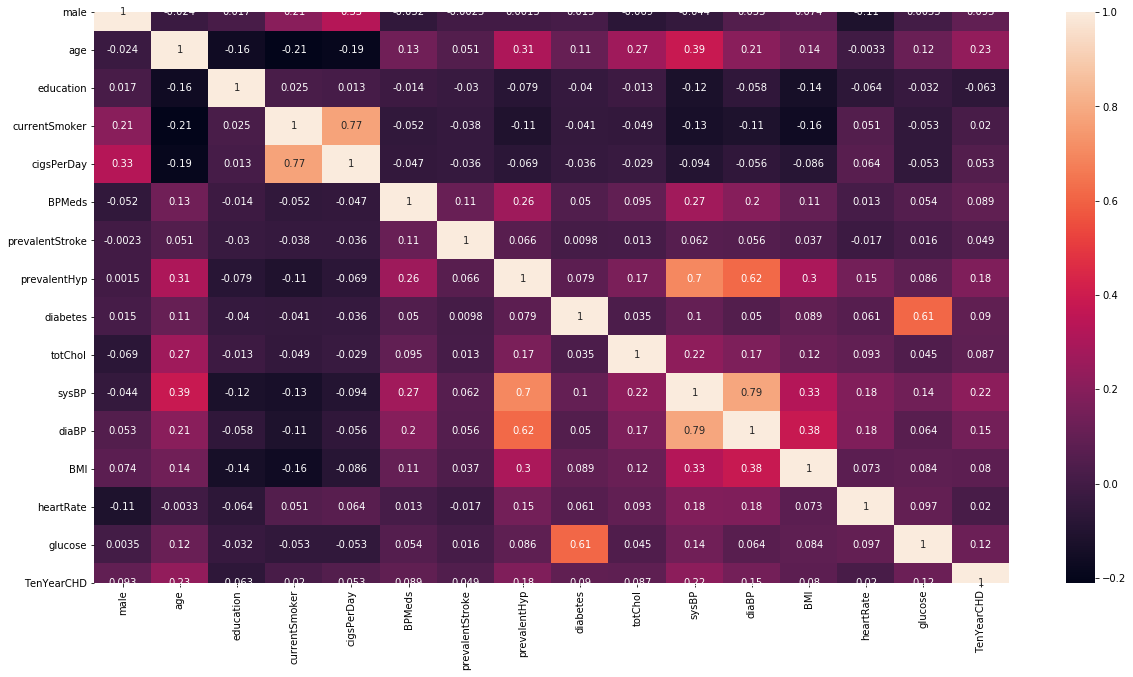

In [18]:
plt.figure(figsize=(20.5,10.5), facecolor='w')
sns.heatmap(correlation,xticklabels=correlation.columns,yticklabels=correlation.columns,annot=True)

In [22]:
correlation.sort_values(by='TenYearCHD', ascending=False).TenYearCHD

TenYearCHD         1.000000
age                0.232985
sysBP              0.219350
prevalentHyp       0.180020
diaBP              0.147560
glucose            0.120978
male               0.093060
diabetes           0.090217
BPMeds             0.089481
totChol            0.086513
BMI                0.079704
cigsPerDay         0.053226
prevalentStroke    0.048523
currentSmoker      0.020476
heartRate          0.019559
education         -0.062565
Name: TenYearCHD, dtype: float64

- 학력의 상관계수는 오히려 음수가 나왔다. 이를 제외하고 학습데이터에 이용해 보려 한다.

In [23]:
features = ["age", "sysBP", "prevalentHyp", "diaBP", "glucose", "male", "diabetes", "BPMeds", "totChol", "BMI", "cigsPerDay","prevalentStroke", "currentSmoker", "heartRate"]

([<matplotlib.patches.Wedge at 0x136ee8d30>,
 [Text(-0.9771273228937835, 0.505195204702527, '0'),
  Text(0.9771272755939905, -0.5051952961877872, '1')],
 [Text(-0.5329785397602455, 0.27556102074683286, '84.8%'),
  Text(0.5329785139603583, -0.27556107064788393, '15.2%')])

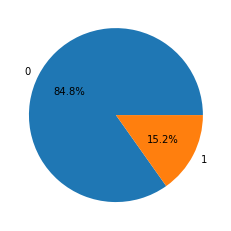

In [24]:
plt.pie(data.TenYearCHD.value_counts(),autopct="%1.1f%%",labels=[0,1] )

- 심장병이 없는 케이스가 훨씬 많은 데이터를 가지고 있다.
- label 데이터의 불균형으로 인한 학습오류가 있을 수 있다.

In [25]:
from sklearn.utils import resample

label_0 = data[data.TenYearCHD==0]
label_1 = data[data.TenYearCHD==1]

In [26]:
label_1=resample(label_1,replace=True,n_samples=len(label_0),random_state=40)

In [27]:
data_samp = pd.concat([label_0, label_1])

In [28]:
data_samp.shape

(6198, 16)

([<matplotlib.patches.Wedge at 0x142e3b7f0>,
 [Text(6.735557395310444e-17, 1.1, '0'),
  Text(-2.0206672185931328e-16, -1.1, '1')],
 [Text(3.6739403974420595e-17, 0.6, '50.0%'),
  Text(-1.1021821192326178e-16, -0.6, '50.0%')])

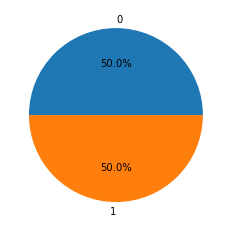

In [29]:
plt.pie(data_samp.TenYearCHD.value_counts(),autopct="%1.1f%%",labels=[0,1] )

- sampling을 활용해 데이터 불균형 문제를 해결해 보려 한다.

In [30]:
data_samp.TenYearCHD.value_counts()

0    3099
1    3099
Name: TenYearCHD, dtype: int64

In [31]:
target = data_samp

## 학습데이터 준비

In [32]:
target.drop(["education"],axis=1, inplace=True)

In [33]:
target.columns

Index(['male', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [34]:
X = target.iloc[:,:14]
Y = target.iloc[:,-1:]

In [32]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.3, random_state=1)

In [33]:
from sklearn.preprocessing import MaxAbsScaler

scaler = MaxAbsScaler()
train_x = scaler.fit_transform(train_x)
test_x = scaler.transform(test_x)

### Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression

logi = LogisticRegression()

In [35]:
model = logi.fit(train_x, train_y)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [36]:
y_hat = model.predict(test_x)

In [37]:
y_hat

array([1, 1, 0, ..., 1, 0, 0])

In [38]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, classification_report

In [39]:
accuracy_score(test_y, y_hat)

0.6978494623655914

### Random Forest

In [40]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

In [41]:
model_rf = rf.fit(train_x, train_y)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


In [42]:
y_hat_rf = model_rf.predict(test_x)
accuracy_score(test_y, y_hat_rf)

0.9655913978494624

### MLP Classifier

In [52]:
from sklearn.neural_network import MLPClassifier

mlp = mlp=MLPClassifier(solver='adam', learning_rate_init = 0.0005, learning_rate = 'adaptive',
                        activation="logistic", max_iter=3000, random_state=10)

In [56]:
mlp.fit(train_x, train_y)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


MLPClassifier(activation='logistic', learning_rate='adaptive',
              learning_rate_init=0.0005, max_iter=3000, random_state=10)

In [57]:
y_hat_mlp = mlp.predict(test_x)

In [58]:
accuracy_score(test_y, y_hat_mlp)

0.6967741935483871

### Catboost

In [61]:
from catboost import CatBoostClassifier

In [90]:
model = CatBoostClassifier(iterations=500, loss_function="Logloss", depth=10, learning_rate=0.1)

In [91]:
model.fit(train_x,train_y)

0:	learn: 0.6531827	total: 14.4ms	remaining: 7.19s
1:	learn: 0.6174498	total: 28.5ms	remaining: 7.1s
2:	learn: 0.5844230	total: 43.5ms	remaining: 7.2s
3:	learn: 0.5639836	total: 57.2ms	remaining: 7.1s
4:	learn: 0.5485988	total: 72.7ms	remaining: 7.2s
5:	learn: 0.5222057	total: 86.7ms	remaining: 7.14s
6:	learn: 0.5012246	total: 100ms	remaining: 7.05s
7:	learn: 0.4871937	total: 113ms	remaining: 6.96s
8:	learn: 0.4740420	total: 127ms	remaining: 6.93s
9:	learn: 0.4640068	total: 140ms	remaining: 6.87s
10:	learn: 0.4504553	total: 153ms	remaining: 6.81s
11:	learn: 0.4427922	total: 166ms	remaining: 6.76s
12:	learn: 0.4361516	total: 180ms	remaining: 6.73s
13:	learn: 0.4292870	total: 193ms	remaining: 6.7s
14:	learn: 0.4202333	total: 208ms	remaining: 6.74s
15:	learn: 0.4099010	total: 226ms	remaining: 6.82s
16:	learn: 0.3985491	total: 240ms	remaining: 6.82s
17:	learn: 0.3920502	total: 256ms	remaining: 6.84s
18:	learn: 0.3856962	total: 273ms	remaining: 6.9s
19:	learn: 0.3774082	total: 290ms	remaini

174:	learn: 0.0615166	total: 2.7s	remaining: 5.01s
175:	learn: 0.0608008	total: 2.71s	remaining: 5s
176:	learn: 0.0603048	total: 2.73s	remaining: 4.98s
177:	learn: 0.0597722	total: 2.74s	remaining: 4.96s
178:	learn: 0.0594797	total: 2.76s	remaining: 4.94s
179:	learn: 0.0587295	total: 2.77s	remaining: 4.92s
180:	learn: 0.0583197	total: 2.78s	remaining: 4.91s
181:	learn: 0.0577223	total: 2.8s	remaining: 4.89s
182:	learn: 0.0574535	total: 2.81s	remaining: 4.87s
183:	learn: 0.0570645	total: 2.82s	remaining: 4.85s
184:	learn: 0.0565492	total: 2.84s	remaining: 4.83s
185:	learn: 0.0559555	total: 2.85s	remaining: 4.81s
186:	learn: 0.0555611	total: 2.86s	remaining: 4.79s
187:	learn: 0.0551130	total: 2.88s	remaining: 4.78s
188:	learn: 0.0543966	total: 2.89s	remaining: 4.76s
189:	learn: 0.0538627	total: 2.91s	remaining: 4.74s
190:	learn: 0.0533923	total: 2.92s	remaining: 4.73s
191:	learn: 0.0530355	total: 2.94s	remaining: 4.71s
192:	learn: 0.0528121	total: 2.95s	remaining: 4.69s
193:	learn: 0.052

336:	learn: 0.0214504	total: 4.99s	remaining: 2.41s
337:	learn: 0.0214095	total: 5.01s	remaining: 2.4s
338:	learn: 0.0213030	total: 5.02s	remaining: 2.38s
339:	learn: 0.0212051	total: 5.03s	remaining: 2.37s
340:	learn: 0.0210746	total: 5.05s	remaining: 2.35s
341:	learn: 0.0209425	total: 5.06s	remaining: 2.34s
342:	learn: 0.0208367	total: 5.07s	remaining: 2.32s
343:	learn: 0.0207329	total: 5.09s	remaining: 2.31s
344:	learn: 0.0206197	total: 5.1s	remaining: 2.29s
345:	learn: 0.0204670	total: 5.12s	remaining: 2.28s
346:	learn: 0.0203833	total: 5.13s	remaining: 2.26s
347:	learn: 0.0202795	total: 5.14s	remaining: 2.25s
348:	learn: 0.0201678	total: 5.16s	remaining: 2.23s
349:	learn: 0.0200420	total: 5.17s	remaining: 2.21s
350:	learn: 0.0199685	total: 5.18s	remaining: 2.2s
351:	learn: 0.0198763	total: 5.2s	remaining: 2.18s
352:	learn: 0.0197753	total: 5.21s	remaining: 2.17s
353:	learn: 0.0196784	total: 5.22s	remaining: 2.15s
354:	learn: 0.0195661	total: 5.24s	remaining: 2.14s
355:	learn: 0.01

In [92]:
y_hat_cat = model.predict(test_x)

In [93]:
accuracy_score(test_y, y_hat_cat)

0.9618279569892473